## Intern : Archita Negi ##

# Exploratory Data Analysis - Terrorism(Level - Intermediate)
● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’\
● As a security/defense analyst,try to find out the hot zone of terrorism.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Reading the data into the memory
df=pd.read_csv("globalterrorismdb_0718dist.csv")
df.shape

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(181691, 135)

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#Calculating the percentage of nulls in each column
df.isnull().sum()/df.count()

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    18.665656
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related        6.256610
Length: 135, dtype: float64

In [5]:
#Selecting columns with fewer nulls
df=df[["eventid","iyear","imonth","iday","country_txt","region_txt","latitude","longitude","attacktype1_txt","targtype1_txt","weaptype1_txt","nkill","ishostkid"]]
columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','weaptype1_txt':'weapon_type','nkill':'no of people killed'}
df.rename(columns=columns,inplace=True)

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   eventid              181691 non-null  int64  
 1   year                 181691 non-null  int64  
 2   month                181691 non-null  int64  
 3   day                  181691 non-null  int64  
 4   country              181691 non-null  object 
 5   region               181691 non-null  object 
 6   latitude             177135 non-null  float64
 7   longitude            177134 non-null  float64
 8   attack_type          181691 non-null  object 
 9   target_type          181691 non-null  object 
 10  weapon_type          181691 non-null  object 
 11  no of people killed  171378 non-null  float64
 12  ishostkid            181513 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 18.0+ MB


In [7]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows

60

In [8]:
df.isnull().sum()/df.count()

eventid                0.000000
year                   0.000000
month                  0.000000
day                    0.000000
country                0.000000
region                 0.000000
latitude               0.025720
longitude              0.025726
attack_type            0.000000
target_type            0.000000
weapon_type            0.000000
no of people killed    0.060177
ishostkid              0.000981
dtype: float64

## Handling null values ##

In [9]:
df["no of people killed"]=df["no of people killed"].fillna(df["no of people killed"].mean())

In [10]:
df.head(10)

,eventid,year,month,day,country,region,latitude,longitude,attack_type,target_type,weapon_type,no of people killed,ishostkid
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,1.000000,0.0
1,197000000002,1970,0,0,Mexico,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.000000,1.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,15.478598,120.599741,Assassination,Journalists & Media,Unknown,1.000000,0.0
3,197001000002,1970,1,0,Greece,Western Europe,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,2.403272,0.0
4,197001000003,1970,1,0,Japan,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,2.403272,0.0
5,197001010002,1970,1,1,United States,North America,37.005105,-89.176269,Armed Assault,Police,Firearms,0.000000,0.0
6,197001020001,1970,1,2,Uruguay,South America,-34.891151,-56.187214,Assassination,Police,Firearms,0.000000,0.0
7,197001020002,1970,1,2,United States,North America,37.791927,-122.225906,Bombing/Explosion,Utilities,Explosives,0.000000,0.0
8,197001020003,1970,1,2,United States,North America,43.076592,-89.412488,Facility/Infrastructure Attack,Military,Incendiary,0.000000,0.0
9,197001030001,1970,1,3,United States,North America,43.072950,-89.386694,Facility/Infrastructure Attack,Government (General),Incendiary,0.000000,0.0


##  Terrorism activities in various regions ##

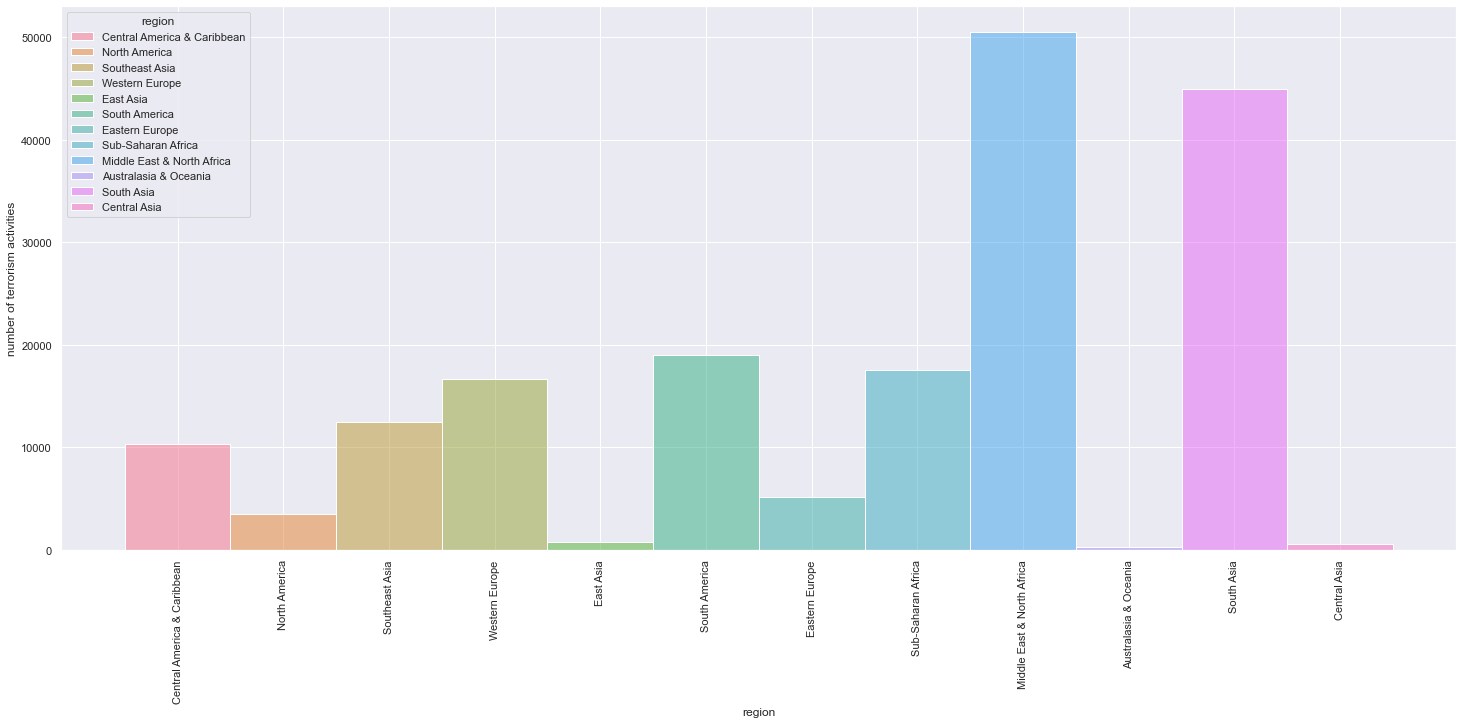

In [11]:
fig=plt.figure(figsize=(25,10))
sns.histplot(x='region',data=df,hue='region')
plt.xticks(rotation=90)
plt.ylabel('number of terrorism activities')
plt.show()

Middle East and North Africa, South Asia has most terrorism cases

## Top 15 terrorism struck countries ##

<AxesSubplot:>

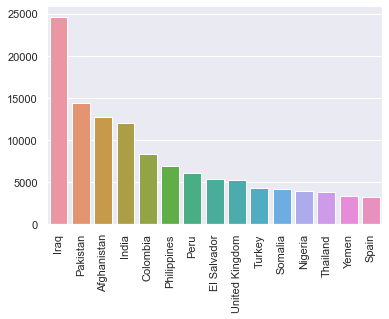

In [12]:
plt.xticks(rotation=90)
sns.barplot(x=df['country'].value_counts()[:15].index,y=df['country'].value_counts()[:15].values)

Most terrorism is observed in Iraq

## Terrorism activities over time ##

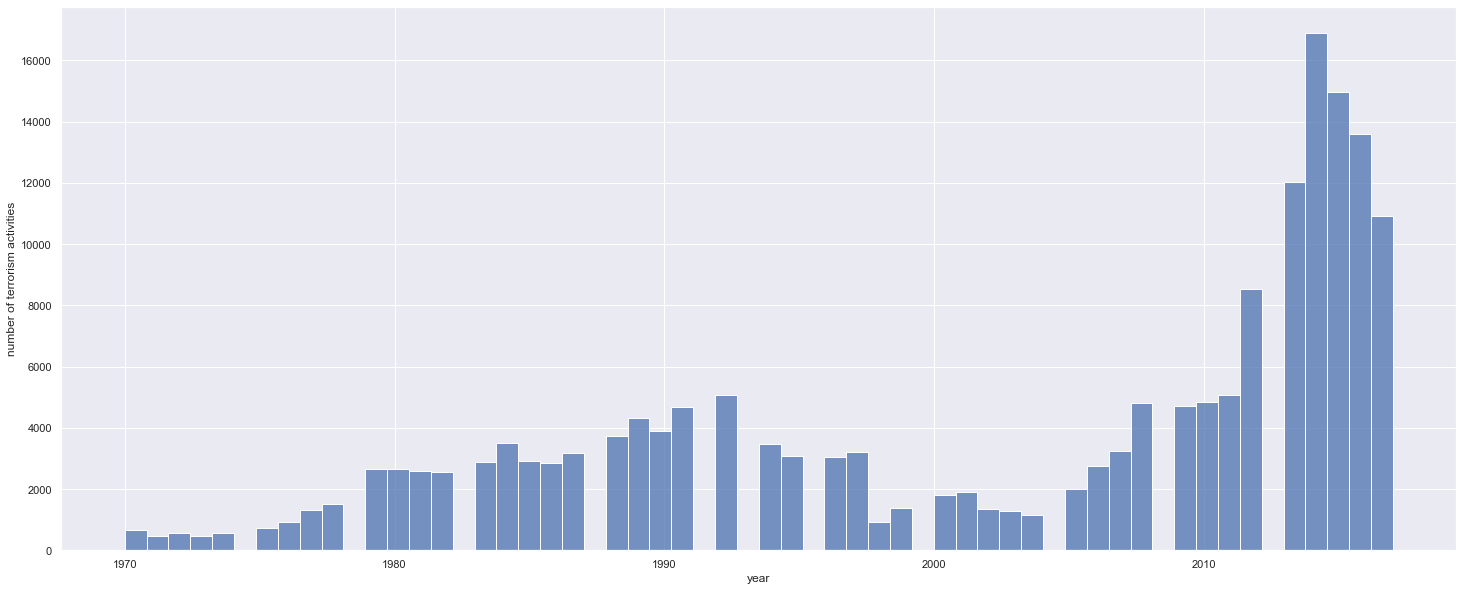

In [13]:
fig=plt.figure(figsize=(25,10))
sns.histplot(x='year',data=df)
plt.ylabel('number of terrorism activities')
plt.show()

Terrorism has increased significantly after 2010

## Number of people killed due to terrorism in different regions ##

<AxesSubplot:xlabel='region'>

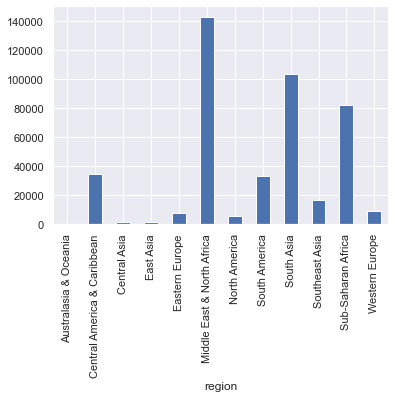

In [14]:
df.groupby(by='region')['no of people killed'].sum().plot(kind='bar')

Middle east and North Africa observes maximum casualties due to terrorism followed by South Asia

## Number of people killed in 15 most terrorism struck countries ##

In [15]:
newdf=df.groupby(by='country')['no of people killed'].sum().sort_values(ascending=False)[:15]

In [16]:
newdf=pd.DataFrame(newdf)
newdf.reset_index(inplace=True)

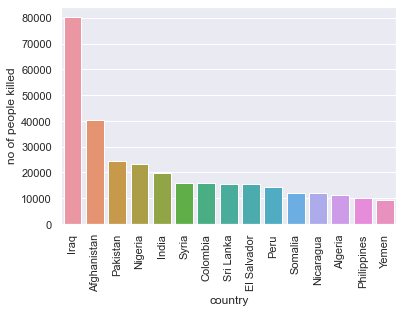

In [17]:
sns.barplot(x=newdf['country'],y=newdf['no of people killed'],data=newdf)
plt.xticks(rotation=90)
plt.show()

## Targets of Terrorist ##

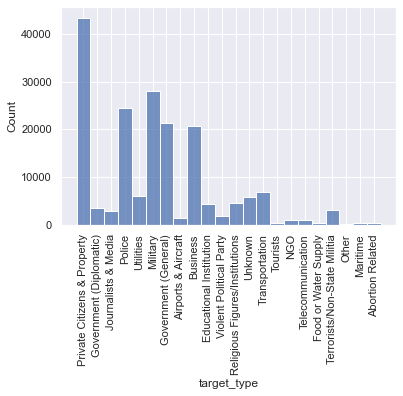

In [18]:
sns.histplot(x='target_type',data=df)
plt.xticks(rotation=90)
plt.show()

Terrorist have primarily targeted Private Citizens and Property

## Number of people killed due to terrorism over the years ##

<Figure size 1080x216 with 0 Axes>

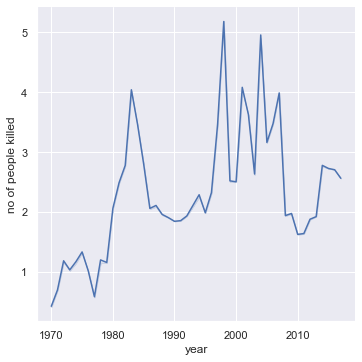

In [19]:
fig = plt.figure(figsize=(15, 3))
sns.relplot(x="year", y="no of people killed", kind="line",ci=False, data=df)

Years near 2000 has seen most number of casualties due to Terrorism

## Type of attacks used by Terrorists ##

In [20]:
df['attack_type'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

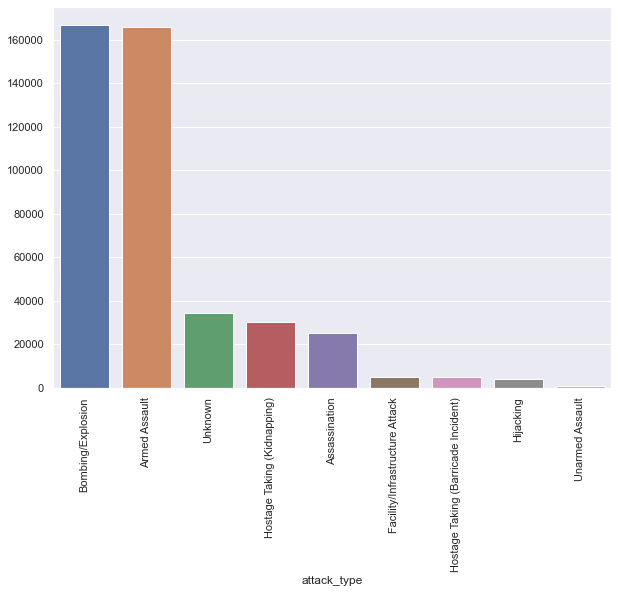

In [21]:
fig=plt.figure(figsize=(10,7))
sns.barplot(x=df.groupby(by='attack_type')['no of people killed'].sum().sort_values(ascending=False).index,
            y=df.groupby(by='attack_type')['no of people killed'].sum().sort_values(ascending=False).values)
plt.xticks(rotation=90)
plt.show()

Terrorists have used bombing and armed assault as attack type

## Number of kills with different weapon type ##

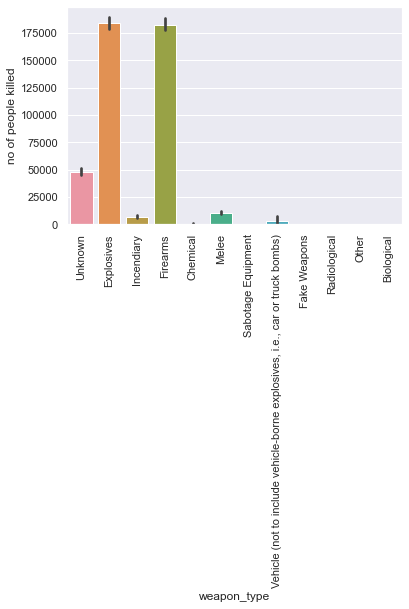

In [22]:
sns.barplot(x="weapon_type",y="no of people killed",data=df,estimator=sum)
plt.xticks(rotation=90)
plt.show()

## Inference ##
Exploratory data analysis on 'Terrorism' dataset gives us following insights:
- Terrorism is widely spread in Middle East and North Africa, South Asia and hence have most casualties due to it.
- Iraq, Pakistan, India, Colombia are most most terrorism struck countries.
- Iraq, Pakistan, India, Colombia also have most casualties due to terrorism.
- Terrorism cases have seen most increment after 2010 with maximum in 2014-1015.
- Civilians and property are major targets of terrorists.
- Terrorist primarily use explosives to attack via bombing. Armed assault is second most used attack type used by terrorists.
